# 데이터 베이스등 라인업

- 종류
  - 데이터 베이스
  - 데이터 웨어 하우스
  - 데이터 마트


---
- 종류

  - 데이터 레이크
  - 데이터 레이크 하우스

- 비교

| 구분 | 데이터베이스 (Database) | 데이터 웨어하우스 (Data Warehouse) | 데이터 마트 (Data Mart) |
|---|---|---|---|
| 목적 | 실시간 데이터 처리 및 저장(OLTP: Online Transaction Processing)|전사적 데이터 분석 및 의사결정 지원(OLAP: Online Analytical Processing)|특정 부서/팀의 데이터 분석 및 의사결정 지원 |
| 데이터 | 현재의 정형 데이터 (최신 정보 유지) | 과거부터 현재까지의 대규모 데이터 (역사적, 통합적) | 특정 주제(Subject)에 초점을 맞춘 데이터 웨어하우스의 부분 집합 |
| 사용자 | 현업 실무자, 응용 프로그램 | 데이터 분석가, 비즈니스 인텔리전스(BI) 전문가 | 특정 부서의 사용자 (예: 마케팅팀, 재무팀) |
| 특징 | • 빠른 읽기/쓰기 속도<br>- 정규화된 데이터 구조<br>- 트랜잭션 처리에 최적화 | • 대규모 데이터 저장 및 분석<br>- 주제 지향적, 통합적, 시계열적 데이터 |- 읽기 중심의 작업에 최적화<br>- 데이터 웨어하우스보다 작은 규모<br>- 특정 비즈니스 요구에 신속하게 대응<br>- 구축 비용과 시간이 상대적으로 적게 소요 |
| 구조 | 관계형(RDB), NoSQL 등 다양 | 스타 스키마, 눈송이 스키마 등 분석에 용이한 구조 | 데이터 웨어하우스와 유사하거나 더 단순한 구조 |


|--|데이터베이스 (OLTP)|데이터 웨어하우스|데이터 레이크|데이터 레이크하우스|
|--|--|--|--|--|
|목적|실시간 거래 처리|정형 데이터 기반 분석|모든 원본 데이터 저장|분석과 머신러닝 통합|
|데이터|현재, 정형 데이터|과거~현재, 정제된 데이터|모든 형태의 원본 데이터|모든 형태의 원본 데이터|
|핵심|빠른 읽기/쓰기, 안정성|BI 리포팅, SQL 분석|유연성, 대용량 저장|통합, 효율성|
|사용자|현업 사용자, 응용 프로그램|데이터 분석가, BI 전문가|데이터 과학자, ML 엔지니어|모든 데이터 관련 직군|
|제품|RDB<br>Oracle,MySQL, MSSQL, PostgreSQL<br>NoSQL<br>MongoDB (문서), Redis (키-값),Cassandra (컬럼)|클라우드 기반<br> Google BigQuery, Amazon Redshift, Snowflake<br>온프레미스<br>Teradata, Oracle Exadata|Amazon S3<br>MS ADLS<br>Google GCS|Databricks<br>Snowflake<br>Google BigQuery<br>Azure Synapse Analytics|

# 데이터 베이스설치

- 로컬 PC
  - 개발 PC에 설치
    - 무료, 유료 버전 존재
    - 외부 접속 (ip 필요함)
  - 방식
    - os레벨 설치(일반적)
    - DOCKER 기반 위에 컨테이너로 설치
      - os영향 X
      - docker hub를 통해 데이터를 포함한 형태로 디비 이미지 저장 -> 진행 x
- 클라우드
  - AWS, Azure, 구글 클라우드
    - 빌려쓴다 -> 어디서든 접근 가능
  - AWS
    - ROS 서비스
      - 전용사용
    - EC2 서비스에 개별 설치로 사용

- Docker 설치
  - mysql 컨테이너 설치
  - 명령어(CLI)는 제공되는것 사용
  - 과정
    - https://www.docker.com/ 접속
    - Download `Docker Desktop`
      - OS별로 다운로드 및 설치
      ```
          컨테이너(리눅스기반)
        -----------------------
              linux
          docker engine
        -----------------------
              os
      ```
      - 컨테이너는 s/w 1개, 환경 1세트등 의미


```
  docker run --name mysql -e MYSQL_ROOT_PASSWORD=1234 -p 3306:3306 -d mysql:latest --character-set-server=utf8mb4 --collation-server=utf8mb4_unicode_ci
```

- 설치중
```
Unable to find image 'mysql:latest' locally
latest: Pulling from library/mysql
2d2e12748936: Pull complete
2eec82031557: Pull complete
a807c273bf16: Pull complete
1e7bb6f23380: Pull complete
48df181eca63: Pull complete
14016e5704e9: Pull complete
42ab5c52ff90: Pull complete
023a182c62a0: Pull complete
b3b4ab4514f3: Pull complete
bd41962a6e17: Pull complete
Digest: sha256:135bc87cce147c3d28cecb9ad270b814cb52805af7ddeea83bfcaf157d05a6b2
Status: Downloaded newer image for mysql:latest
ff79820653b9c1b74afcb2bc4da354092cacf3312c59bbb21c13cd94a6dc997
```

- docker 기반 mysql 설치(컨테이너) 명령
  - 명령어 CLI 기반
  ```
    docker
    run     # 이미지를 다운, 이미지 기반 컨테이너 생성
    --name mysql  # 컨테이너의 이름
    -e MYSQL_ROOT_PASSWORD=1234 # root계정의 비
    -p 3307:3306 # mysql 시그니처 포트 3306번(0~65535)
      # 외부에서 도커 내부의 mysql 컨테이너 접속시 사용 포트는 3306(앞쪽)
      # 윈도우 -> 도커 -> 컨테이너 접속 : 3307
      # 컨테이너 내부에서 mysql 접속시 사용 포트 3306(뒤쪽)
    -d # 백그라운드에서 컨테이너 가동, mysql은 언제든지 접근할 수 있게 처리
    mysql:latest # 이미지명

    # 한글 처리 관련 인코딩 적용
    --character-set-server=utf8mb4
    --collation-server=utf8mb4_unicode_ci
  ```

  - 참고
    - 이미지 : os, s/w등 하나의 형태로 컨테이너가 될 수 있는 파일로 저장된 형태.
      - 오피셜 마크 (오리지널 회사 제공)
        - 오라클 => 오라클, mysql....
        - 신뢰할 수 있다
      - 개인이 생성한 이미지
        - 원본 오리지널 이미지 => 커스터마이즈하여 올린 이미지
        - 경우에 따라 해킹 주의
      - 도커 허브에서 다운로드 가능
    - 이미지를 기반 실제 구동되는 서비스 : 컨테이너
    - 인바운드 : 외부에서 내부로 접근(엑세스)시
    - 아웃바운드 : 내부에서 외부로 접근

## 접속 테스트

- 디비가 설치된 로컬
  - docker > container > mysql > name:mysql 클릭 > exec
  ```
    sh-5.1# mysql -u root -p
    Enter password:
    Welcome to the MySQL monitor.  Commands end with ; or \g.
    Your MySQL connection id is 9
    Server version: 9.4.0 MySQL Community Server - GPL

    Copyright (c) 2000, 2025, Oracle and/or its affiliates.

    Oracle is a registered trademark of Oracle Corporation and/or its
    affiliates. Other names may be trademarks of their respective
    owners.

    Type 'help;' or '\h' for help. Type '\c' to clear the current input statement.

    mysql> show databases;
    +--------------------+
    | Database           |
    +--------------------+
    | information_schema |
    | mysql              |
    | performance_schema |
    | sys                |
    +--------------------+
    4 rows in set (0.012 sec)

    mysql> exit;
    Bye
    sh-5.1#
  ```
- 원격
  - 터미널 or client tool(GUI)
    - client tool(GUI)
      - mysql 워크벤치 (오피셜 제공)
      - (*)하이디sql (경량)
        - https://www.heidisql.com/download.php#google_vignette
        - 포터블 버전사용
          - 압축해제 > exe실행 > 세션관리자 추가
          ```
            docker 세션명
            ip : 127.0.0.1
            사용자 : root
            비번 : 1234
          ```
          - 저장 > 열기 > client 화면 오픈 (원격 접수 OK)

      - vscode(IDE)의 extension에서 설치 가능

- 데이터 밀어넣기 (일종의 복원)
  - 파일 > sql 파일 실행 > 바로 실행 > sql_test.sql
    - t1 디비 생성
      - 테이블 7개 생성
      - 데이터 약 10만개 추가함.
      - city table
        - 전세계 국가별 도시/구역/인구수등
      - country table
        - 국가 정보 면적/국가명 등
      - countrylanguage table
        - 국가별 언어정보

# 실습 데이터 세팅

# SQL 구성

- Structured Query Language
  - 구조화된 질의 언어
  - 데이터베이스와 통신(대화)을 수행하는 언어
- 구성
  - SQL = DQL + DDL + DCL(or + TCL) + DML
    - 4개의 서브 언어로 구성
    - 통성 대소문자 구분 X
    - 약자
      - Data xxx Language
        - Querry, Definition, Control, Manipulation

#DQL



- Data Query Language
- 데이터베이스로부터 원하는 데이터를 가져오는(추출/회득한다) 쿼리
- 데이터 질의어
- SQL
  ```
    select or SELECT :
    show : 메타 정보 회득
  ```

### show

```
# 데이터 베이스 목록 출력, 어떤 디비가 있는지 확인
SHOW DATABASES;
```

### use 데이터베이스명

- 사용할 데이터베이스 지정
- 이후 명시적 변경이 없으면 해당 디비만 사용

```
use t1;

# '테이블명|컬럼명|데이터베이스명|...'
# 키워드(혹은 예약어)와 동일한 명칭 사용시
use 't1';
```

### show tables

- 현재 사용 디비 기준 소속된 테이블 목록 출력
```
SHOW tables;
```

### desc (or describe) 테이블명

- 특정 테이블 상세 정보 출력
```
desc city;
describe city;

+-------------+----------+------+-----+---------+----------------+
| Field       | Type     | Null | Key | Default | Extra          |
+-------------+----------+------+-----+---------+----------------+
| ID          | int      | NO   | PRI | NULL    | auto_increment |
| Name        | char(35) | NO   |     |         |                |
| CountryCode | char(3)  | NO   | MUL |         |                |
| District    | char(20) | NO   |     |         |                |
| Population  | int      | NO   |     | 0       |                |
+-------------+----------+------+-----+---------+----------------+
5 rows in set (0.002 sec)
```

### select

- 특정 테이블에서 필요한 데이터를 가져오는(추출하는, 회득하는) 구문
- 가장 많이 사용

```
# [ ... ] <= 생략 가능함
SELECT select_express (조회 결과로 받는 내용 (컬럼, 함수....)
    [FROM table_reference] # 데이터 출처
    [WHERE condition] # 1차 조건
    [GROUP BY {col_name|express|potion} ] # 집계(범주형 데이터)
    [HAVING condition] # 2차 조건
    [ORDER BY (오름|내림)n개 나열가능 ] # 정렬
    [LIMIT [시작], 끝 ] # 제한
```

### SELECT ~ FROM

- 특정 테이블로부터 데이터 추출(획득)
- 가장 기본 조회 쿼리

```
# city 테이블의 모든(*) 데이터 가져오시오
# (4079, 5) <= 데이터 shape(rows, cols)
# *는 위험한 표현임. 디비가 렉걸릴 수 있음
# *는 배제, 필요한 컬럼만 나열

SELECT *
FROM city;

# 특정 컬럼 1개에 대한 데이터만 추출
# city 테이블의 name 컬럼만 추출
# `` => 예약어 중복 사용 대비
select `name`
from city;

# 특정 컬럼 2개에 대한 데이터 추출
# 컬럼명, 컬럼명 => 필요한 만큼 , 를 구분자로 나열
select `name`, population
from city;

# 컬럼명 길거나, 의미가 애매하거나, 필요시
# 별칭을 부여하여 결과셋을 재구성 가능
# as 별칭
select `name`, population AS popu
from city;
```

#### select ~ from ~ where ~

- 특정 조건에 해당되는 조회 결과만 추출(회득, 가져옴)
- 조건이 없다면 전체데이터 -> 데이터양에 따라 렉이 걸릴 수 있음(자제)
- 조건 => 연산자
  ```
    - 조건연산자 ( =, <, >, <=, >=, <> )
    - 관계연산자 (NOT, AND, OR)
    - 연산자 조합으로 구성
  ```

```
# SELECT 연습

-- 요구사항
-- city 테이블에서
-- 인구수 5000000 이상(>=) 되는 도시 데이터 추출
-- 컬럼 정보 전부 회득
SELECT *
FROM city
WHERE city.Population >= 5000000
;
-- (24, 5)


-- 인구수 5백만 이상(>=)이고  6백만 이하(<=)인
-- 도시의 모든 정보 추출하시오
SELECT *
FROM city
WHERE city.Population >= 5000000 AND city.Population <= 6000000
;
-- (4, 5)

-- 위와 동일한 쿼리에서 도시수를 구한다면
-- 위 조건을 만족하는 도시의 수는?
-- select_express ->  count()로 계산하시오
-- 결과셋의 컬럼명은 cnt 로 하시오 (별칭)
-- count( 컬럼명|* )
SELECT COUNT(*) AS cnt
FROM city
WHERE city.Population >= 5000000 AND city.Population <= 6000000
;

-- 일치하지 않는다(<>, !=)
-- 도시의 인구수가 1780000이 아닌 도시의 총수
-- 전체수 : 4079, 조건에 해당되는 수 : 4078
SELECT COUNT(*) AS cnt
FROM city
WHERE city.Population <> 1780000
# WHERE city.Population != 1780000
;

-- 시티 테이블에서
-- 한국(KOR)이거나 미국(USA)에 있는
-- 모든 도시 정보를
-- 출력하시오
SELECT *
FROM t1.city AS c
WHERE c.CountryCode='KOR' OR c.CountryCode='USA'
;
-- (344,5)

-- 시티 테이블에서
-- 한국(KOR) 도시들중(이고), 인구수가 백만이상인
-- 모든도시 정보를
-- 추출하시오
-- 디비명.테이블명 지칭 가능
-- 디비명.테이블명 as 별칭 가능
-- 별칭, 컬럼명 가능
SELECT *
FROM t1.city AS c
WHERE c.CountryCode='KOR' AND c.Population >= 1000000
;
-- 조건식의 배치에 따라 결과셋이 완성되는 시간(자원)이
-- 상이함 => 최적화(표현, 수행시간, 리소스사용량등 고려)
-- 조건식 구성
SELECT *
FROM t1.city AS c
WHERE c.Population >= 1000000 and c.CountryCode='KOR'
;
```

##### select ~ from ~ where ~ BETWEEN ~

- BETWEEN
  - 조건에 사용되는 컬럼의 데이터가 수치형(연속형)** 해당되는 경우
  - BETWEEN a AND b 조합
  - a <= x <= b
  ```
    -- 데이터를 특정 구간으로 그룹화
    -- ex) 20대, 30대, 40대... 세대간 그룹화
    --    vvip, vip... 고객 등급 그룹화
    case when ~ then
      when ~ BETEEN a AND b then ~
      when ~ BETEEN c AND d then ~
      when ~ BETEEN e AND f then ~
      when ~ BETEEN g AND h then ~
      ...
      else ~ end
  ```

```
-- 인구수 5백만 이상(>=)이고, 6백만 이하(<=)인
-- 도시의 모든 정보 추출하시오
-- Between ~ and ~ 사용 전제 => 조건식보다 간결해짐
SELECT *
FROM city
WHERE population BETWEEN 5000000 AND 6000000;
-- (4, 5)
```

##### in

- 컬럼 데이터가 `범주형 데이터`인 경우 적합
  - 특정 컬럼의 데이터의 종류를 셀 수 있다.
  - 범위 X, 구분용도
- 나열한 데이터들 중에 포함되면(IN) 추출 대상이 됨


```
-- 도시 이름들중
-- 서울, 부산, 인천인 경우 -> in
-- 즉, 전체 도시들중 서울, 부산, 인천 정보만 추출하시오
-- 전체 도시 정보 추출하시오
-- 대소문자 구분 X (별도 상세 조건 x)
SELECT *
FROM city
WHERE `name` IN('seoul','pusan','inchon')
;

-- 한국(KOR), 미국(USA), 일본(JPN), 프랑스(FRA) 속한
-- 모든 도시들을 모아서, 총수를 구하시오
-- 총수의 결과셋의 컬럼명은 city_count
SELECT COUNT( countrycode ) AS city_count
FROM city
WHERE city.CountryCode IN('KOR','USA','JPN','FRA')
;
-- 632개

-- 위의 결과셋와 비추어(조건동일)
-- 도시명과 인구수 추출
-- 단(조건추가), 인구수가 6백만명 이상(>=)인 경우에해당됨.
SELECT city.`Name`, city.Population
FROM city
WHERE city.CountryCode IN('KOR','USA','JPN','FRA')
AND city.Population >= 6000000
;
-- (3, 2)
```

#### 서브쿼리 (sub query)

- 쿼리문 내(안)에 쿼리문 존재
- 주의사항
  - 서브 쿼리문의 결과셋이 2개 이상이 나오는 경우 오류 발생함 -> 해결방안을 추가
- 위치 (주로 많이 보이는 위치)
  - 조건의 값 (아래 예시)
    - where ~
    - having ~
  - 필요한곳이면 모두 사용 가능
    - from 서브쿼리(결과셋은 n개 ok)
      - join  진행시 진행 체크 예정

```
-- 서브쿼리
-- 요구사항. 프랑스의 국가코드르 모르겠다.
-- 단, 파리라는 도시가 프랑스의 도시인것은 알겠다.
-- 파리 -> 도시정보 획득 -> 국가코드 획득 -> 프랑스의
-- 모든 도시 정보 획득

-- 1단계 파리(paris)라는 도시명을 이용하여 국가코드 획득
SELECT countrycode
FROM city
WHERE `name`='paris' -- 값은 '값'으로 표현(타입무관)
;
-- FRA => 결과셋이 1개이다 (1,1)
-- 2단계 1단계 결과를 이용하여 프랑스 모든 도시 정보추출
SELECT *
FROM city
-- WHERE countrycode='FRA'
WHERE countrycode=(
			SELECT countrycode
			FROM city
			WHERE `name`='paris' )
;
-- (40,5)


-- 서브쿼리 오류상황 -> 결과셋이 2개 이상 (여기서는 6개)
SELECT countrycode
FROM city
WHERE city.District='New York'
;

-- 오류 발생 (서브 쿼리 결과가 2>=)
-- 어떤 결과에 조건을 붙일지 판단 X
SELECT *
FROM city
where countrycode=(SELECT countrycode
						 FROM city
						 WHERE city.District='New York')
;

-- 해결 => 이들중 한가지만 선택하여 만족하면 OK => any|some
-- 해결 => 이들중 모두 만족하면 OK => all
```

###### ANY(최소 하나라도 만족)

```

-- 해결 => 이들중 한가지만 선택하여 만족하면 OK => any|some
--  any|some => 수치형인 경우 범위(>, <)
--              같다(=) 수치형|범주형 => in과 유사함
-- 해결 => 이들중 모두 만족하면 OK => all

-- 뉴욕주에 포함된 모든 도시들의 인구수들 보다 큰 인구수를
-- 가진 모든 도시의 정보를 가져오시오

-- 뉴욕주에 포함된 모든 도시들중 인구수가
-- 가장 작은 인구수(93994)보다
-- 크기만 하면 대상이 되는 모든 도시 정보 획득
SELECT *
FROM city
WHERE city.population > ANY (SELECT population
						 FROM city
						 WHERE city.District='New York')
;
-- (3782, 5)
SELECT *
FROM city
WHERE city.population > SOME (SELECT population
						 FROM city
						 WHERE city.District='New York')
;
-- (3782, 5)

-- = 처리 했을시 => IN과 동일한 효과를 발생함
-- IN을 사용하고 싶은데
-- 데이터를 일일이 나열하기 귀찮다(동적처리를 원한다)
SELECT *
FROM city
WHERE city.population = ANY (SELECT population
						 FROM city
						 WHERE city.District='New York')
;



-- countrycode들중 일치되는게 하나라도 있으면 모두 포함
-- 범주형 OK( =만 사용 가능, <나 >은 의미가 달라질수 있다)
SELECT *
FROM city
where countrycode = ANY (SELECT countrycode
						 FROM city
						 WHERE city.District='New York')
;

```

##### ALL(모두만족)

```
-- ALL
-- 서브쿼리의 모든 결과셋보다 인구수가 크면 대상이됨(모두만족)
-- 가장 큰값보다 크면 대상
SELECT *
FROM city
WHERE city.population > ALL (SELECT population
						 FROM city
						 WHERE city.District='New York')
;
-- (9,5)

```

#### ORDER BY

- 조회 결과(결과셋)를 특정 조건에 맞게 정렬
  - 1차정렬, 2차정렬.... 필요한만큼 추가 가능
  - 쿼리분담 1회성 -> 정렬하고 -> 결과셋 -> 정렬 => 서브쿼리 검토해야함 (차후확인)
- 기본값
  - ASC (오름차순)
  - 생략가능
- 기타값
  - DESC (내림차순)
- 형식
  ```
    order by 컬럼명|조건식
    정렬키워드[, [... 반복]]
  ```

```
# order by
-- 모든 도시의 정보중 인구수를
-- 오름차순 기준(작은값 -> 큰값) 으로 정렬하여 추출
SELECT *
FROM city
ORDER BY city.Population ASC;
# 인구수 정렬값 => 42, 167, .... , 10500000

-- 기본 정렬은 오름차순 -> 표기법 생략
SELECT *
FROM city
ORDER BY city.Population;

-- 인구수를 기준으로 내림차순 정렬
SELECT *
FROM city
ORDER BY city.Population DESC;

-- 인구순 내림차순, 국가코드 오름차순 정렬하여 도시정보출력
-- ,로 나열
-- 인구수가 같은 확률이 아주 적어서 결과셋에서
-- 적용된  의미를 확인하기가 어려움.
SELECT *
FROM city
ORDER BY city.Population DESC, city.CountryCode ASC;


# 범주형 데이터를 먼저 정렬후, 인구 배치
# 알파벳 체크하여 인구를 체크하는 자연스러운 배치가 됨
# 국가별로 인구수를 내림차순으로 정렬하는 효과
# 전체는 오름차순, 국가내에서는 인구수기준 내림차순으로
# 데이터정렬
SELECT *
FROM city
ORDER BY city.CountryCode ASC, city.Population DESC;

-- 인구는 내림차순
-- 한국 도시만 대상
-- 대상 도시의 모든 정보 추출
SELECT *
FROM city
WHERE city.CountryCode = 'KOR'
# 조건구문 이후 거의 마지막에 위치함
ORDER BY city.Population DESC
;
-- (70, 5)

-- country 테이블에서
-- 국가 정보 모든것
-- 면적순으로 내림차순 정렬
SELECT c.`Name`, c.SurfaceArea
FROM country AS c
ORDER BY c.SurfaceArea DESC
;
```

#### select ~ distinct ~ from

- 중복 제거
  - 중복된 데이터가 존재한다면 1개만 출력
  ```
    - select express에서 사용
    - 뒤에 나오는
    select distinct 컬럼(ex) countrycode)
  ```

```
-- 중복 데이터가 많은 범주형 데이터 컬럼에 적합
-- city 테이블에서 모든 국가 코드를 구하시오
-- 단, 국가별 1개의 코드만 추출함, 정렬 여부는 옵션 구현
SELECT distinct countrycode
FROM city
order BY countrycode ASC
;
-- (232, 1)
```

#### LIMIT

- 결과셋의 개수(혹은 범위)를 제한
- 형식
  - limit n
    - 상위부터 n개까지만 출력
  - limit n, m
    - 게시판의 페이징 처리시 사용

```
-- city 테이블에서 모든 국가 코드를 구하시오
-- 단, 국가별 1개의 코드만 추출함
SELECT distinct countrycode
FROM city
ORDER BY city.CountryCode ASC
;
-- (232, 1)


-- 국가 면적 및 이름을 추출
-- 면적순으로 정렬(큰값->작은값)
-- 상위 top10만 출력함
SELECT c.`Name`, c.SurfaceArea
FROM country AS c
ORDER BY c.SurfaceArea DESC
LIMIT 10
;
-- (239, 2) -> 전체 결과셋에서 상위 10개만 제한


-- limit n(결과셋에서 시작위치), m(페이지당 데이터수)
-- 페이지당 데이터수 : 한페이지에 보이는 데이터(게시물)수
SELECT c.`Name`, c.SurfaceArea
FROM country AS c
ORDER BY c.SurfaceArea DESC
-- LIMIT 0, 10
-- LIMIT 10, 10
-- (24-1)*10 => 24페이지 표현
LIMIT 230, 10 -- 마지마 게시물은 10개 안돼서 9개만 출력(적은 수도 OK)
;
-- limit (페이지번호-1)*(페이지당출력(데이터수)수=M), M
```

#### GROUP BY 집계

- 특정 컬럼을 그룹화하여 집계
  - 특정 컬럼의 같은 값을 가진(조건에 맞게 `그룹화`된) 데이터를 모아서, 집계 수행
    - **범주형 데이터(ex) 국가코드:구분용, 중복발생)를 가진 컬럼이 대상**
    - **집계, 그룹, 피벗**
    - **그룹화 => 통계 처리 필수적으로 따라옴**
  - 모아진 데이터는 `별칭`을 사용하여 관리
  - 그룹의 대표값을 설정함으로, 세부 정보를 손실됨

- **집계후 select_express 에서 사용할수 있는 대상**
  - **집계의 대상이된 컬럼**
    - 고유값 1개만 표시(그룹의 상징/구분값)
  - **집계함수를 사용한 형태**
    - 통계값, 수치값(그룹을 대표값)

- 집계 함수들과 같이 사용(활용) -> 수학처리
  - AVG()
  - MIN()
  - MAX()
  - COUNT()
  - COUNT(DISTINCT ~)
  - STDEV()
  - VARIANCE()

```
-- 집계 -> 그룹의 대표값  예시
-- 같은 국가코드를 가진 데이터끼리 그룹화 하여 집계 처리
-- `group by countrycode`
-- 데이터셋의 컬럼은
-- 국가코드(컬럼직접사용=집계대상), 인구의 최소값(min_popu)
-- 데이터는 '인구의 최소값' 기준 오름차순 정렬
-- 상위 탑10만 출력
SELECT countrycode, MIN(population) AS min_popu
-- SELECT name <- 에러발생, 집계 기준컬럼만 직접 사용 가능
FROM city
GROUP BY countrycode
ORDER BY min_popu ASC
LIMIT 10
;

-- 국가별(집계) 도시 인구 평균을 구해서, 내림차순 정렬
-- 상위 탑 5위부터  10개 출력
-- 출력값 국가코드, 평균인구수( avg_popu )
SELECT c.CountryCode, AVG(c.Population) AS avg_popu
FROM city AS c
GROUP BY c.CountryCode
ORDER BY avg_popu DESC
LIMIT 4, 10
;
```

- 리뷰 실습
  - car_db.sql 데이터 삽입
  - car_product 테이블
  - price 컬럼 -> 판매가(혹은 주문가)
  - 주의 : 수치로 보이는 값이 실제는 문자열
    ```
      price컬럼(문자열)
      40,000,000 => ,가 표기되어 있음
      sum( cast(replace(price, ',', '') as UNSIGNED) ) as 주문총액
    ```
  - 요구사항
    - car_product 테이블 대상
    - 주문수, 주문금액, 평균주문금액을 출력하시오 => 집계 문제
    - 집계 대상(자유롭게 선정)
      - 모델
      - 자동차회사
    - 필요시 서브쿼리등 앞에서 배운 내용 모두 총동원

#### HAVING

- 1차 조건에 대한 결과셋에 대한 2차 조건
  - where : 최초(1차) 결과셋을 구성하는 내용 조건
  - having : 최초 혹은 집계(통상 2차) 이후 내용에 대한 조건
    - where ~ having ~
    - where ~ group by ~ having ~
    |

```

-- 국가별(집계)
-- 최대인구수(max_popu) 기준 내림차순 정렬
-- 출력 : 국가코드, 최대인구수
SELECT countrycode, MAX(population) AS max_popu
FROM city
GROUP BY countrycode
ORDER BY max_popu DESC
;

-- 위의 결과에서, 9백만명 이상(>=)만 대상으로 출력
-- max_popu는 1차 조건(혹은 집계의) 결과물 -> where X
-- 1차 쿼리후 파생된 결과물을 대상으로 조건 -> HAVING
SELECT countrycode, MAX(population) AS max_popu
FROM city
GROUP BY countrycode
HAVING max_popu >= 9000000
ORDER BY max_popu DESC
;
-- (6, 2)

-- (리뷰 연습) 위의 문제 기준,
-- 국가별 도시수가 30개 이상 <= 조건 추가(모집합 대상)
-- 1차 조건 부여함. => 서브쿼리등 다양한 방법 동원
-- 인 국가를 대상으로 위의 문제 해결

```

#### ROLLUP

- 중간집계
- GROUP BY ~ WITH rollup

#### JOIN

- 데이터베이스내에 다른 테이블 레코드와 조인 (결합)하여, 새로운 결과셋을 생성
- <img src="https://firebasestorage.googleapis.com/v0/b/repo-27c12.appspot.com/o/sql%2Fsql_join.png?alt=media&token=9779d791-580e-44dc-8e0f-05d17a58148b">

```
-- 대상 테이블 수 확인
SELECT COUNT(*) FROM city;   	# 데이터수 (4079, 5)
SELECT COUNT(*) FROM country;	# 데이터수 (239, 15)

-- 가장 기본 조인
-- 2개 테이블에 공통으로 존재하는 컬럼 (국가코드)
-- 공통 컬럼을 중심으로 데이터를 연결

-- 요구사항
-- city,country 테이블을 대상으로 inner join
-- 특정 컬럼이 일치하면 하나의  row 데이터로 구성
-- 2개 테이블 기준 -> 결과셋 -> 왼쪽 테이블 같거나 작음
SELECT *
FROM city AS c
-- 조인(기본형이 inner join)
JOIN country AS co
-- 결합조건
ON c.CountryCode = co.Code
;
-- (4079, 20) => (city 테이블의 총 데이터수, 모든 컬럼수)

-- 필요한 데이터만 추출
-- 도시명, 국가코드, district, 인구수, 면적만 추출한다
-- 컬럼명도 위에 언급한대로 구성
SELECT
	c.`Name` AS 도시명,
	co.Code AS 국가코드,
	c.District ,
	c.Population AS 인구수,
	co.SurfaceArea AS 면적
FROM city AS c
JOIN country AS co
ON c.CountryCode = co.Code
;

-- countrylanguage
DESC countrylanguage;

-- 한국 국가코드를 기반으로 언어 정보 모두 추출
SELECT *
FROM countrylanguage
WHERE countrycode='JPN';
-- 통상 하나의 국가에 언어를 1개 이상 사용한다(비중있게)

-- 요구사항
-- 3개 테이블 조인
-- city, country, countrylanguage
-- join은 필요시 계속 진행 가능함
SELECT *
FROM city AS A
JOIN country AS B ON A.CountryCode=B.code
JOIN countrylanguage AS C ON A.CountryCode=C.CountryCode
;
-- (30670, 24)
-- 국가별로 사용하는 언어수가 1개가 아니므로,
-- n개(제각각) => 이로 인한 데이터 증가(케이스 생성)
-- 데이터가 inner 개념에서는 많아질수 있음

-- left join => 실제 데이터에서는 결측 발생 확률 높음
-- (4079, 5) => 왼쪽 테이블의 데이터의 수 보장
SELECT
	A.`Name`, B.Code, A.District,
	A.Population, B.SurfaceArea
FROM city AS A
LEFT JOIN country AS B
ON A.CountryCode = B.Code
;
-- RIGHT JOIN => 실제 데이터에서는 결측 발생 확률 높음
-- (4086, 5) => 오른쪽 테이블의 데이터는 보장(고정) 조인
SELECT
	A.`Name`, B.Code, A.District,
	A.Population, B.SurfaceArea
FROM city AS A
right JOIN country AS B
ON A.CountryCode = B.Code
;
```

#### union, union all

- 두개 이상 결과 집합을 합친다
- 단, 컬럼수, 이름이 동일해야함
- 차이
  - union : 중복제거 O, 원본에 비해 데이터 수 줄어들 수 있음
  - union all : 중복제거X, 모두 합쳐짐

```
-- 도시명, 인구수 출력, 한국만 대상, 인구수는 9백만 이상<-1
-- 도시명, 인구수 출력, 한국만 대상, 인구수는 8십만 이상<-8
-- 2개 결과를 합치시오
SELECT NAME, POPULATION
FROM city
WHERE countrycode='kor' AND POPULATION>=9000000
union
SELECT NAME, POPULATION
FROM city
WHERE countrycode='kor' AND POPULATION>=800000
;

SELECT NAME, POPULATION
FROM city
WHERE countrycode='kor' AND POPULATION>=9000000
UNION all
SELECT NAME, POPULATION
FROM city
WHERE countrycode='kor' AND POPULATION>=800000
;

```

#### 연습
```
SELECT CAST(REPLACE('4,000', ',', '') AS UNSIGNED

-- car_product 이해
DESC car_product;
-- 브랜드, 모델, 타입 확인
SELECT DISTINCT pdt.brand, `TYPE`, model
FROM t1.car_product AS pdt
;
--가격대한 데이터/타입 보정
-- 샘플값 직접 대입하여 확인 => 테이블 적용하여 컬럼반영
SELECT
	CAST(REPLACE(price, ',', '') AS UNSIGNED) AS 주문액
	FROM t1.car_product
	LIMIT 5 # 상위값 5개 확인 => DataFrame.head()
;
-- 집계
SELECT
	pdt.model, # 자동차 모델명
	SUM( CAST(REPLACE(price, ',', '') AS UNSIGNED) )
	AS 주문총액,
	COUNT( price ) AS 주문건수
FROM t1.car_product AS pdt
GROUP BY pdt.model
ORDER BY 주문총액 desc
;
-- car_order 확인
DESC car_orderdetail;

-- car_orderdetail 주문 건수
SELECT COUNT(*)
FROM car_orderdetail
;

-- 요구사항 (리뷰, 쉬는시간)
-- car_orderdetail, car_product를 이용하여
-- 모델명, 주문수, 총주문액, 평균주문액 출력
-- 쿼리문을 작성하시오
```

#### 주요 내장 함수

##### 연산자

- 조건연산자 ( =, <, >, <=, >=, <>, != )
- 관계연산자 (NOT, AND, OR)
- (*)문자열 특수 연산자
- 산술연산자 (+, -, *, /, ..)
  - 특정 칼럼의 값을 일괄적 연산 처리 가능함

```
-- 문자열 관련 특수 연산자
-- country테이블에서 국가명에 kor이 들어있다면
-- 모두 추출하시오 -> 검색
SELECT *
FROM country
WHERE country.`Name` LIKE '%kor%'
;

-- ea로 끝난 다면
SELECT *
FROM country
WHERE country.`Name` LIKE '%ea'
;

-- sou 로 시작하는
SELECT *
FROM country
WHERE country.`Name` LIKE 'sou%'
;


-- 산술연산자 활용
-- 한국 면적을 각 국가 면적으로 나눠서
-- 각국가면적/한국 면적 => 비율(부동소수)
-- 한국보다 면적이 큰(>) 국가만
-- 국가코드, 대비값(비율) 를 구하시오

-- 한국면적 -> 1개의 값 -> 서브쿼리 활용
-- 99434.0
SELECT c.SurfaceArea
FROM country AS c
WHERE c.Code='kor'
;

-- 구현 1차버전( 한국면적 고정하여 사용)
-- 비율이 1.0 이상인 데이터만 대상
-- 특정 데이터는 모집합이 모인후->연산작동->결과셋(2차)
SELECT
	ct.Code,
	ct.name,
	ct.SurfaceArea/99434
	AS std_area
FROM country  AS ct
having std_area > 1.0
ORDER BY std_area ASC
;

-- 2차 버전 -> 서브쿼리 활용, 특정 국가코드를 입력하면
-- 자동 계산
-- (109, 3) => 최적화 시도
SELECT
	ct.Code,
	ct.name,
	ct.SurfaceArea/(SELECT c.SurfaceArea
						 FROM country AS c
						 WHERE c.Code='kor')
	AS std_area
FROM country  AS ct
having std_area > 1.0
ORDER BY std_area ASC
;
```

##### 주요 문자열 함수

- 데이터가 문자열이면 대상이 됨

###### LENGTH()

- 문자열의 길이 반환

```
SELECT
	LENGTH('hi'), LENGTH('HI'),
	LENGTH('가나'), # 한글 문자당 3byte의 길이 사용(mysql 제품)
	LENGTH('12'), LENGTH('!@');

-- 컬럼에 문자열 함수 적용
SELECT
	city.`Name`,
	LENGTH(city.`Name`) AS size,
	city.Population,
	LENGTH(city.Population) # 수치값도 가능한지 체크->문자열처리후계산
FROM city
ORDER BY size DESC
LIMIT 5
;

```

###### CONCAT()

- 나열한 문자열(수치 포함)을 모두 결합
  - 하나의 문자열로 생성 -> 전처리
  - 단, 하나라도 NULL(결치기)이 있으면 -> NULL

```
-- concat()
SELECT
	CONCAT('hello','-','world'),
	CONCAT('hello',null,'world') # 결과는 NULL
	;

-- 컬럼에 적용
SELECT CONCAT(NAME, '-', city.Population ) AS spec
FROM city
;
```

###### LOCATE()

- 문자열내에서 특정문자열이 처음 등장하는 위치를 반환
- 시작위치는 1부터 출발
- 0은 없다

```
-- locate()
SELECT
	LOCATE('w', 'world'),	-- 맨처음 위치
	LOCATE('or', 'world'),  -- 2글자 이상 위치 탐색?
	LOCATE('z', 'world')		-- 없는 글자 탐색
;

-- 요구사항
-- city 테이블에서
-- 'se'로 시작하는 도시를 모두 찾아서
-- 그 위치값 계산후 조건에 만족하는 (1<=위치값<=3) 인 도시만 추출하여
-- 도시명, 위치값(loc)을 출력하시오
-- where 사용? having 사용?
-- where => 대상 테이블(혹은 데이터셋)에서 이미 loc가 준비되어있어야함
SELECT *
FROM (SELECT NAME, LOCATE('se', NAME) AS loc FROM city) AS A
WHERE A.loc BETWEEN 1 AND 3
;

-- 위의 표현보다 더 빠름, 리소스를 적게 사용함
SELECT NAME, LOCATE('se', NAME) AS loc
FROM city
HAVING loc BETWEEN 1 AND 3
;
```

###### LEFT(), RIGHT()

- 왼쪽|오른쪽 기준 특정개수 추출

```
-- 왼쪽기준, 오른쪽기준 추출
SELECT LEFT('hello world', 3),
       RIGHT('hello world', 3)
;

-- 문자열 데이터를 가진 컬럼값  자르기
SELECT LEFT(name, 3),
		 NAME,
       RIGHT(name, 3)
FROM city
;
-- 수치  데이터를 가진 컬럼값  자르기
SELECT LEFT(city.Population, 3),
		 Population,
       RIGHT(Population, 3)
FROM city
;
```

###### LOWER(), UPPER()

- 대|소문자 변환

```
-- 대소문자 변환
-- 특정 컬럼이 추가됨
SELECT NAME, LOWER(NAME), UPPER(NAME), LOWER('aB1가!') AS test
FROM city
;
```

###### REPLACE()

- 문자열 대체

```
-- 특정 문자열 대체 (문자열데이터, 수치데이터등 적용가능)
SELECT city.Population, REPLACE( city.Population, '0','*')
FROM city
;
```

###### TRIM()

- 공백제거
  - 앞, 뒤, 양쪽, 특정문자(공백제외한) 제거 -> 전처리
  -> 전처리
- 지정자
  - BOTH : 양끝에 존재하는 특정 문자 제거
  - LEADING : 앞쪽에 존재하는 특정 문자 제거
  - TRAILING : 뒤쪽에 존재하는 특정 문자 제거
- 미지정 => 공백제거

```
-- 공백제거
-- 각 패턴에 맞게 공백 제거후 남은 문자열 반환
SELECT
	TRIM('  A B  '),
	TRIM('  AB'),
	TRIM('AB  '),
	TRIM(LEADING '@' FROM '@@@ a @@@'),
	TRIM(TRAILING '@' FROM '@@@ a @@@'),
	TRIM(both '@' FROM '@@@ a @@@')
;

-- city 테이블에서
-- 도시명의 첫글자중 'S'를 제거
-- 출력 : 도시명, s가 제거된 도시명
-- 도시명이 'S'로 시작되는 데이터만 출력
SELECT `NAME`, TRIM(LEADING 'S' FROM `NAME`)
FROM city
WHERE `NAME` LIKE 'S%';

```

######FORMAT()

- 포멧팅
  - 숫자 타입의 형식변화시 사용
```
-- 요구사항
-- 포멧 함수를 사용하면 문자열로 대체
mysql> select population, format(population, 0) from city limit 5
    -> ;
+------------+-----------------------+
| population | format(population, 0) |
+------------+-----------------------+
|    1780000 | 1,780,000             |
|     237500 | 237,500               |
|     186800 | 186,800               |
|     127800 | 127,800               |
|     731200 | 731,200               |
+------------+-----------------------+
5 rows in set (0.001 sec)
```

###### SUBSTRING()

- 문자열 자르기(특정 위치에서 특정 길이만큼)
- 공백 추가(버전마다 작동 안 될 수 있음)
```
-- 문자열 자르기
-- 특정위치로부터 특정 길이(개수)만큼 문자 반환(자르기, 추출)
SELECT SUBSTRING('ABCD', 2, 2)

-- 국가명, 국가명(처음부터 3글자만) 앞부분
SELECT c.`Name`, SUBSTRING( c.`Name`, 1, 3)
FROM country AS c
;
```

##### 수학

###### floor(), ceil(), round()

- 내림, 반올림, 반올림

```
-- 내림, 올림, 반올림
SELECT
	FLOOR(3.95), # 3
	CEIL(3.95),  # 4
	CEIL(3.11),  # 4
	ROUND(3.5),	 # 4
	ROUND(3.4),  # 3
	CEILING(1.56), # 2
	CEILING(1.11)	# 2
;
```

###### sqrt(), pow(), exp(), log()

- sqrt() : 양의 제곱근
- pow(a, b) : a는 밀수, b는 지수 => a의 b거듭제곱
- exp() <-> 역함수 <-> log()
  - exp() : e의 거듭제곱
  - log() : 자연로그 값 계산 -> 데이터 분포 조정

```
-- 수학함수
SELECT
	SQRT(4),
	POW(2,3),
	EXP(3),
	LOG( 20.085536923187668 ),
	LOG( EXP(3) )
;
```


###### PI(), SIN(), COS(), TAN()

- 삼각함수, 파이
- GPS 데이터를 기준으로 직선거리 계산시 활용할 수 있음
- 기타 데이터 전처리시 사용

```
-- 삼각함수
SELECT PI(), SIN( PI()/2 ), COS( PI() ), TAN( PI()/4 ) ;
```

###### ABS(), rand(), std(), variance()

- ABS() : 절대값
- rand() : 난수 0.0 <= X <= 1.0
- 데이터의 퍼짐 설명
  - std() : 표준편차
  - variance() : 분산

```
-- 표준편차, 분산 (인구수로 임시 표현)
-- 분산의 루트제곱을 씨우면 표준편차가 계산됨
-- 표준편차는 실데이터와 같은 단위로 표현 -> 선호
-- 0에 가까울수록 지표상 좋다(평가)
-- 리뷰시간, 국가명도 출력하시오
-- NGA라는 국가는 도시가 64개 있는데 도시간 인구 차이가 작다
-- 한국은 70개의 도시가 있는 도시간 인구 격차가 크다
SELECT
	countrycode,
	STD(city.Population) AS ST,
	VARIANCE(city.Population) AS VA,
	COUNT(countrycode) AS cnt
FROM city
GROUP BY countrycode # 같은 국가간 도시를 그룹화
HAVING cnt >= 50 # 50개 이상 도시를 가진 국가만 추출
ORDER BY st ASC;
```

##### 시간

###### NOW(), CURDATE(), CURTIME()

- 현재 날짜 + 시간
  - NOW() =  CURDATE() + CURTIME()
  - YYYY-MM-DD HH:MM:SS

```
-- 현재 날짜, 시간, 종합
SELECT CURDATE(), CURTIME(), NOW()
-- 현재 시간이 다른 경우, 디비상 설정 시간이 다른 시간대로 세팅
;

-- 요구사항
-- 년 -월, 시:분 출력하시오
SELECT LEFT(CURDATE(), 7), LEFT(CURTIME(), 5)
;
```

###### DATE(), MONTH(), DAY(), HOUR(), MINUTE(), SECOND(), MONTHNAME(), DAYNAME(), DAYOFWEEK(), DAYOFMONTH(), DAYOFYEAR()

- 기준시(혹은 설정된 시간(디비기준)) 대비세부 시간 정보 추출
- 시간|요일|계절|월 단위별 통계 분석 가능

```
-- 시간정보를 넣어서 세부 정보 추출
SELECT NOW(),
	DATE( NOW() ), MONTH( NOW() ), DAY( NOW() ),
	HOUR( NOW() ), MINUTE( NOW() ), SECOND( NOW() ),
	-- 월, 요일 정보
	MONTHNAME( NOW() ), DAYNAME( NOW() ),
	-- 주|월|년 단위 소요된 day
	DAYOFWEEK( NOW() ), DAYOFMONTH( NOW() ), DAYOFYEAR( NOW() )
;

```

Date_format()

- 전달받은 날짜 정보와 형식에 맞춰서 포멧팅(혹은 생성)
```
-- 날짜 + 시간 정보를 원하는 형태로 구성
-- %D : 일(xth) 월간기준 몇번째일, %j : 1년기준 몇일째 되는 날
SELECT DATE_FORMAT( NOW(), '%y %m %D %d , %j %s')
;
```

###### Date_format()

- 전달받은 날짜 정보와 형식에 맞춰서 포멧팅(혹은 생성)

```
-- 날짜+시간 정보를 원하는 형태로 구성
-- %D : 일(xth) 월간기준 몇번째일, %j:1년기준 몇일째되는날
SELECT DATE_FORMAT( NOW(), '%y %m %D %d , %j %s')
;
```

###### 시간차이계산

- datediff()
  - 회원 가입일로부터 현재까지 경과된 일 수 계산
  - 최초 구매 이후 다음 구매까지 소요될 일 수 계산
```
-- 시간 계산 기능 확인
# 개강한 날부터 현재까지 소요된 일수
SELECT DATEDIFF( NOW(), '2025-10-01' );
-- 나중 시간을 먼저 배티(아니면 음수로 계산)
SELECT DATEDIFF( '2025-10-01', NOW() );

-- 절대 값으로 보정 가능
SELECT ABS(DATEDIFF( '2025-10-01', NOW() ) );
```

##### 형변환

- 타입변환
  ```
    cast( 원본값 as 타입명|표현)
    or
    date, json, signed, unsigned, char(xx)
    
  ```
  - char : 고정크기의 문ㅈ자열 차입
    - 사이즈 명시
  - varchar : 가변크기 문자열타입
    - 기본사이즈 명시(최소)
```
-- 형변환
SELECT
	CAST( '123' AS UNSIGNED),	-- 문자열 -> 수치
	CAST( 2 AS CHAR(1) ),		-- 수치 -> 문자열(자리수)
	CAST( 20251022 AS DATE),	-- 수치 -> 시간
	CAST( '20251022' AS DATE)	-- 문자열 -> 시간
```

##### 랭킹(순위)

- ROW_NUMBER()
  - 정렬된 순서대로 랭킹 부여
  - 동점 x, 동점도 정렬된 순서대로 배치
- RANK()
  - 동점 순위 존재
  - 그 개수만큼 다음 순위는 생략됨
- DENSE_RANK()
  - 동점 순위 존재
  - 그 다음 순위는 순서대로 부여함

```
-- 랭킹
-- 전체 사원들의 랭킹(예시)
SELECT
	co.mem_no,
	co.order_date
	-- 랭킹
	,ROW_NUMBER()	OVER ( ORDER by order_date ASC ) AS RANK1
	,RANK() 			OVER ( ORDER by order_date ASC ) AS RANK2
	,DENSE_RANK()	OVER ( ORDER by order_date ASC ) AS RANK3
FROM car_order AS co;


-- partition by 의미
-- partition by 컬럼 => 이를 대상으로 그룹화하여 랭킹(개발팀, 디자인팀, 분석팀등등 개별 랭킹)
SELECT
	co.mem_no,
	co.order_date
	-- 랭킹
	,ROW_NUMBER()	OVER ( PARTITION by mem_no ORDER by order_date ASC ) AS RANK1
	,RANK() 			OVER ( PARTITION by mem_no ORDER by order_date ASC ) AS RANK2
	,DENSE_RANK()	OVER ( PARTITION by mem_no ORDER by order_date ASC ) AS RANK3
FROM car_order AS co;

-- (3977,1)
SELECT DISTINCT co.mem_no
FROM car_order AS co;

-- 4094
SELECT COUNT(*)
FROM car_order;
```

#### 일반

##### 범위지정

- 특정 컬럼의 값을 기준(범위 기준) 데이터를 나눠서 그룹화 전략
- 특정 집단을 구분할수 있는 컬럼을 결과셋에 추가하는 개념(범주형 값으로 세팅 -> 구분할 수 있음 -> 데이터마트 구성시 view 구성할때 종종 등장함)

```
-- 컬럼파트
case
when 조건 then '홍콩보다작은'
when 조건 then '홍콩과한국사이'
else '한국보다큰' end
as sa_flag


SELECT CODE, NAME, c.SurfaceArea,
	case
	when c.SurfaceArea < 1075 then '홍콩보다작은'
	when c.SurfaceArea BETWEEN 1075 AND 99434 then '홍콩과한국사이'
	else '한국보다큰' end
	as sa_flag
FROM country AS c
;
-- 실습
-- 위의 결과를 기반(데이터셋, 테이블로 간주 -> 서브쿼리)으로
-- sa_flag 컬럼 기준 (그룹화 -> 집계)
-- 3개 그룹으로 데이터는 나뉜다 -> 결과
-- 그룹별, 총국가수, 면적평균, 면적최대, 면적최소값을 출력하시오
SELECT  
   case
    	when c.SurfaceArea < 1075
		 then '홍콩보다작은'
    	when c.SurfaceArea BETWEEN 1075 AND 99434
		 then '홍콩과한국사이'
    else '한국보다큰' end
   as sa_flag,
   COUNT(*) AS 총국가수,
	AVG(SurfaceArea) AS 면적평균,
	MAX(SurfaceArea) AS 면적최대,
	MIN(SurfaceArea) AS 면적최소값
FROM country AS c
GROUP BY sa_flag
;
```

# DDL

- Data Definition Language
- 데이터 정의어
- SQL
  - create  : 테이블/데이터베이스 생성
  - alter   : 테이블/데이터베이스 수정
  - index   : 테이블 내에 색인(인덱스) 작성
  - drop    : 테이블/인덱스 모두 삭제
  - view    : 가상 테이블 (데이터 마트 구성시 자주 사용)
- 특징
  - 트렌젝션 발생 x
  - 명령어 즉시 수행

## create

### create database

- 새로운 데이터베이스 생성

```
  create database 데이터베이스면[인코딩...: 최초 msql 설치시 기본 설정한 값을 따름]
```
```
-- 데이터베이스 생성 (기본값 옵션 적용)
CREATE DATABASE IF NOT EXISTS A;
-- 모든 데이터베이스 출력 (생성된것 확인)
SHOW DATABASES;
-- 해당 데이터베이스 사용 지정
USE A;
```


### create table as select

- 특정 테이블을 조회하여, 그것과 동일한 테이블(테이블의 속성, 구조 카피) 생성
- 데이터도 카피

```
-- 요구사항
-- A 데이터베이스에 city_sub 테이블 생성
-- t1 데이터베이스의 city와 같은 구조
-- 데이터는 국가코드가 한국, 미국, 일본만 추출하여 카피
-- 데이터는 국가코드, 도시명, 인구수만 사용(테이블구조, 데이터)

CREATE TABLE A.city_sub
AS
SELECT c.CountryCode, c.`NAME`, c.Population
FROM t1.city AS c
WHERE countrycode IN ('KOR','USA','JPN')
;
```

### create table

- 테이블 생성
  - 특정 주제, 구조를 가진 데이터를 하나의 단위로 관리하기 위한 스키마(혹은 구조), 단위
  - 정형 데이터 구성
```
-- 회원테이블
create table users (
  -- 컬럼명
  id int not null,
  uid varchar(32) not null,
  upw varchar(128) not null,
  email varchar(64) null,
  regdate timestamp not null
);

CREATE TABLE `users` (
	`id` INT NOT NULL COMMENT '회원관리ID',
	`uid` VARCHAR(32) NOT NULL COMMENT '사용자ID' COLLATE 'utf8mb4_unicode_ci',
	`upw` VARCHAR(128) NOT NULL COMMENT '비밀번호' COLLATE 'utf8mb4_unicode_ci',
	`email` VARCHAR(64) NULL DEFAULT '' COMMENT '이메일' COLLATE 'utf8mb4_unicode_ci',
	`ragdate` TIMESTAMP NOT NULL COMMENT '가입일'
)
COMMENT='회원테이블 '
COLLATE='utf8mb4_unicode_ci'
ENGINE=InnoDB
;
```

## Alter table

- 테이블 수정
- 컬럼 추가|수정|삭제
  - 기본형 중심 체크

```
-- 테이블 구조 확인
DESC users;

-- 컬럼 추가
ALTER TABLE users
ADD col INT NULL;
DESC users;

-- 컬럼 수정
-- 바꿀 부분만 명시, 기존 세팅은 유지(충돌 없을때만)
-- 이미 데이터가 있다면 신중하게 작업
ALTER TABLE users
MODIFY col VARCHAR(128);
DESC users;

-- 컬럼 삭제
ALTER TABLE users
drop col;
DESC users;

```

## index(인덱스)

- 목적
  - **빠른 검색**을 통해 데이터를 찾기 위함
  - 특징
    - 사용한다면
      - 장점
        - 검색 성능 향상
          - 테이블 전체를 읽지 않아도 된다.(구현하기 나름)
          - 인덱스가 없다면 데이터가 많을시 탐색 시간도 늘어난다
        - 정렬, 그룹화 시간 향상
        - ..
      - 단점
        - 저장공간 사용(소모)
          - 점점 커집
        - 데이터가 갱신되면 성능 저하
          - 데이터 업데이트, 수정, 삭제, 추가.. 자꾸 발생하면
            - 인덱스 업데이트가 빈번하게 발생
        - 관리 복잡(선택)

- 종류
  - **B-Tree 인덱스** (가장 많이 사용)
    - ex) 주문날짜, (사용자 아이디+비번), (전번+?) 검색
    - 범위 쿼리, 정렬된 데이터에 효과적 반응
    - 데이터에 따라 성능저하가 올 수 있음

  - Hash 인덱스
    - 정확하게 일치하면 검색이 필요할때
      - 사용자 아이디, 전번 검색
    - 범위 쿼리, 정렬이 필요한 경우에는 적절하지 않다

  - Full Text 인덱스
    - 텍스트 검색 효과적, 일부 제품에서만 지원
    - 문서내 키워드, 단어등등 검색시 사용

  - R-Tree 인덱스
    - 지리 정보 시스템(GIS)에서 공간 데이터 검색시 효과적
    - 일반 데이터에서는 부적합
  - ...

```
-- users 테이블의 모든 인덱스 출력
SHOW INDEX FROM users;

-- 인덱스 생성 -> 기본값으로 BTREE 알고리즘 적용
-- CREATE INDEX 인덱스명
CREATE INDEX uid_idx
-- on 테이블명 (컬럼명)
ON users (uid)
SHOW INDEX FROM users;
```

## CREATE unique INDEX

- 중복값 허용x 인덱스

```
SHOW INDEX FROM users;
-- 고유한값을 가진 인덱스 생성
CREATE UNIQUE INDEX email_idx
ON users (email)
;
SHOW INDEX FROM users;

-- 멀티 컬럼의 (고유한값 세트)을 가진 인덱스
CREATE UNIQUE INDEX uid_upw_index
ON users (uid, upw)
;
SHOW INDEX FROM users;

-- uid와 upw가 모두 일치해야 검색 완료
-- 검색 단위가 2개 컬럼을 기준으로 진
```

### index 삭제

```
alter table users
drop index uid_upw_idx;

show index from users;
```

### FULLTEXT INDEX

- 텍스트내 검색 빠른 결과
  - 임시 적용 : 회원가입시 아이디 중복 검사
  - 실제는 작성글을 담은 컬럼에 적용
```
alter table users
add FULLTEXT uid_check(uid);

show index from users;
```

## VIEW

- 특징
  - 데이터베이스에 존재하는 **가상테이블**
  - 실제 테이블 처럼 행과 열을 가지고 있음
  - 실제 데이터 저장 X
  - 뷰어 역활 담당(조회용)
    - 생성된 이후 수정 x
    - 조인등 복잡하게 구성하영 만든다면-> 쿼리문이 단순해짐
    - 인덱스 x
  - 데이터 마트등 특수 목적을 위해서 임시로 구성하여 사용 가능

### create view

- 뷰 생성

```
-- 실습
-- city, country, countrylangauage 조인
-- 한국에 대한 정보로만 -> inner join(교집합)
-- 뷰를 구성
-- 뷰 이름 total_kor_view
-- 컬럼 : 도시명, 면적, 인구수, 랭귀지, -> 영문 컬럼명사용
-- (70, 4) <= 한국에서 0.01가 외국어라서, 한국만 특정하여 조인
-- 포퍼먼스를 위해서 조인 순서는 임의로 조정하였다
CREATE VIEW total_kor_view
AS
SELECT B.`Name`, C.SurfaceArea, B.Population, A.Language
FROM (SELECT *
		FROM countrylanguage
		WHERE countrycode='kor' and language='korean') AS A
JOIN city AS B
	ON A.CountryCode = B.CountryCode
JOIN country AS C
	ON A.CountryCode = C.Code
;
-- WHERE A.CountryCode='kor'

-- 한국어를 모국어로 사용하는 한국 데이터만 추출
SELECT *
FROM countrylanguage
WHERE countrycode='kor' and language='korean';

-- 이 데이터만 가지고 분석등...
SELECT * FROM total_kor_view;

```

### alter view

```
-- 뷰 수정 -> 뷰를 통채로 교체, 수정
SELECT * FROM city_view; -- (4079, 2)

-- 같은 구조, 같은 크기에 내용만 교체
-- 필요시 통째로 교체 가능함 -> 수정
ALTER VIEW city_view
AS
SELECT city.CountryCode AS `name`, city.Population
FROM city
;
SELECT * FROM city_view;
```

### drop view

- 뷰삭제

```
drop view city_view;
```

# DML

- Data Manipulation Language
- 데이터 조작어
- sql
  - insert
    - 데이터를 추가
  - update
    - 데이터를 수정
  - delete
    - 데이터 삭제
    - 조건을 부여하여 삭제
    - 커밋전 복구가능
  - truncate
    - 테이블의 구조는 두고 데이터 삭제
    - 복구 불가
  - drop
    - 테이블 삭제

### insert into, insert into ~ select

- 사전준비

```
-- 데이터 입력
-- 데이터베이스 A에서 실습
USE A;

-- users 삭제
DROP TABLE users;
-- 신규로 테이블 생성
-- PRIMARY KEY : 해당 데이터를 대표하는 값, 고유값,
-- 통상 자동증가(자동부여-> 데이터가 추가되면 자동부여)
CREATE TABLE users (
	id INT NOT NULL PRIMARY KEY AUTO_INCREMENT,
	age INT NULL,
	uid VARCHAR(32) NOT NULL,
	pwd VARCHAR(128) NOT NULL,
	email VARCHAR(64) NULL,
	regdate TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP
);

- unique 키 추가
- uid_pwd, uid, email 3종류 추가(기획의도에 따라 다를수 있음)
```

- 테이블에 데이터 입력
```
SELECT * FROM users;

-- 데이터 추가중 unique에서 오류가 나서 리젝되면->관계없이
-- id(auto_increment)값이 부여되고 반영 x

INSERT INTO users
(age, uid, email, pwd) -- 컬럼 순서 조정(관계없음)
VALUES -- value:비표준(임시허용), values 표준
(25, 'a1', 'a1@a.com', '1234')
;

-- 멀티 데이터 입력
-- 한번에 여러개 데이터를 삽입할때 값을 ()로 묶어서 나열
INSERT INTO users
(age, uid, email, pwd)
VALUES
	(25, 'a3', 'a3@a.com', '1234'),
	(25, 'a4', 'a4@a.com', '1234')
;

-- 컬럼 생략 -> 자동세팅되는 컬럼까지도 직접 부여해라
-- 컬럼의 순서대로 데이터 세팅
-- PRIMARY KEY 최종 사용값을 알아야 대처 가능
-- 기본값을 다 세팅, 컬럼 순서대로 데이터 세팅
INSERT INTO users
VALUES
	(13, 25, 'a5', '1234', 'a5@a.com', NOW())
;


CREATE TABLE `users2` (
	`id` INT NOT NULL AUTO_INCREMENT,
	`age` INT NULL DEFAULT NULL,
	`uid` VARCHAR(32) NOT NULL COLLATE 'utf8mb4_unicode_ci',
	`pwd` VARCHAR(128) NOT NULL COLLATE 'utf8mb4_unicode_ci',
	`email` VARCHAR(64) NULL DEFAULT NULL COLLATE 'utf8mb4_unicode_ci',
	`regdate` TIMESTAMP NOT NULL DEFAULT (CURRENT_TIMESTAMP),
	PRIMARY KEY (`id`) USING BTREE,
	UNIQUE INDEX `uid_pwd` (`uid`, `pwd`) USING BTREE,
	UNIQUE INDEX `uid` (`uid`) USING BTREE,
	UNIQUE INDEX `email` (`email`) USING BTREE
)
COLLATE='utf8mb4_unicode_ci'
ENGINE=InnoDB
AUTO_INCREMENT=1
;

-- 특정 테이블의 특정 데이터를 타겟 타이블에 일괄 입력
INSERT INTO users2
SELECT * FROM users
WHERE id <10
;
```

### update

- 기존 데이터 업데이트(수정)
- 권장( where를 반드시 사용 -> 대상만 반영되게 처리 )

```
-- 업데이트
SELECT * FROM users;
-- id가10번 고객을 찾아서,
-- 나이를 +3 시키시오 (업데이트)
UPDATE users
SET age=age+3
WHERE id=10
;
```

### delete

- 데이터 삭제
- 조건식 같이 병행 권장( 없다면 전체 삭제 )
- 단, 복구(혹은 백업)는 가능함

```
-- 삭제
-- users 테이블에서 나이가 25세를 초과하는 고객 삭제
DELETE FROM users
WHERE users.age > 25;
```

### truncate

- 테이블 데이터, 인덱스(확인)를 모두 삭제
- 복구 불가 기본(로그를 통해서 복구 가능)
- DB가 점유하고 있는 물리적 공간 복구

```
TRUNCATE TABLE users2;
```

### drop

- 테이블, 데이터, 공간등 모두 삭제
- 되돌릴수 없다(단, 로그를 통해 복구 가능)

```
-- 테이블삭제
drop table user2;

-- 디비 삭제
drop database 데이터베이스명;
DROP DATABASE A;
SHOW DATABASES;
```

## 제약조건

- 기본기, 참조키
- 참조키를 이용하면 2개의 테이블을 연결할 수 있다
  - 1:N(일대 다)
    - 1개의 국가 안에 n개의 도시가 존재
    - 1개의 글에 댓글이 n개 존재
    - 1개의 상품에 리뷰가 N개 존재
  - 참조의 대상이 되는 본글(본 데이터)이 삭제되면, 연결된 모든 데이터도(리뷰, 댓글 도시등) 같이 삭제 된다(설정하기 나름)

- ERD 간단 샘플

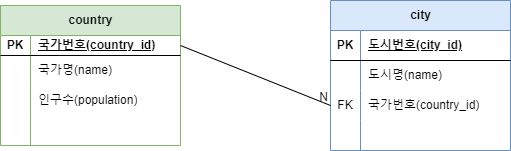

```
-- 참조 관계 테스트
-- 테이블 생성
CREATE TABLE country2(
	country_id INTEGER,
	NAME VARCHAR(50),
	population INTEGER,
	PRIMARY KEY (country_id)
);
/*
	참조키
	FOREIGN KEY (특정컬럼)
		REFERENCE 참조하는테이블(참조하는 컬럼명)
		[ON DELETE CASCADE|...]
*/
CREATE TABLE city2(
	city_id INTEGER,
	NAME VARCHAR(50),
	country_id INTEGER,
	PRIMARY KEY (city_id),
	FOREIGN KEY (country_id)
		REFERENCES country2(country_id)
		ON DELETE CASCADE
);


-- 더미 데이터 삽입
INSERT INTO country2
VALUES
	(1, '한국', 5000),
	(2, '일본', 10000)
;

SELECT * FROM country2;
-- country2의 국가id를 참조하는 데이터 추가
INSERT INTO city2
VALUES
	(1, '서울', 1),
	(2, '도쿄', 2),
	(3, '부산', 1),
	(4, '부산', 2)
;
SELECT * FROM city2;

-- 삭제확인
DELETE FROM country2 WHERE country_id =2;

```

# DCL

- Data Controll Language
- 데이터 제어/접근 제어 관리
- 특정 계정에게 권한 부여, 제거 역할
- SQL
  - GRANT
  - REVOKE

- 계정 생성, 확인, 삭제

```
-- 계정 생성 -> 아이디만 단순하게 구성
CREATE USER guest1;

-- 계정 확인
-- %의 의미는 모든의미, HOST 컬럼값이 %라면 모든 곳에서 접근가능
SELECT
	HOST, user, mysql.user.authentication_string
FROM mysql.user

-- 계정 삭제
DROP user guest1
```

# 리뷰 실습

- 아래 결과처럼 결과셋이 나오게 쿼리를 구성하시오
  - 왼쪽
    - 국가별 인구수가 가장 적은 도시만 추출하시오
    - 특정 국가내에서 특정 도시의 인구수가 동일할수 있음.모두 나오게 처리
    - (235, 3)
  - 오른쪽
    - 한국 인구수, 한국 도시별 인구수총합 -> 내람차순 정렬
    - (71, 3)

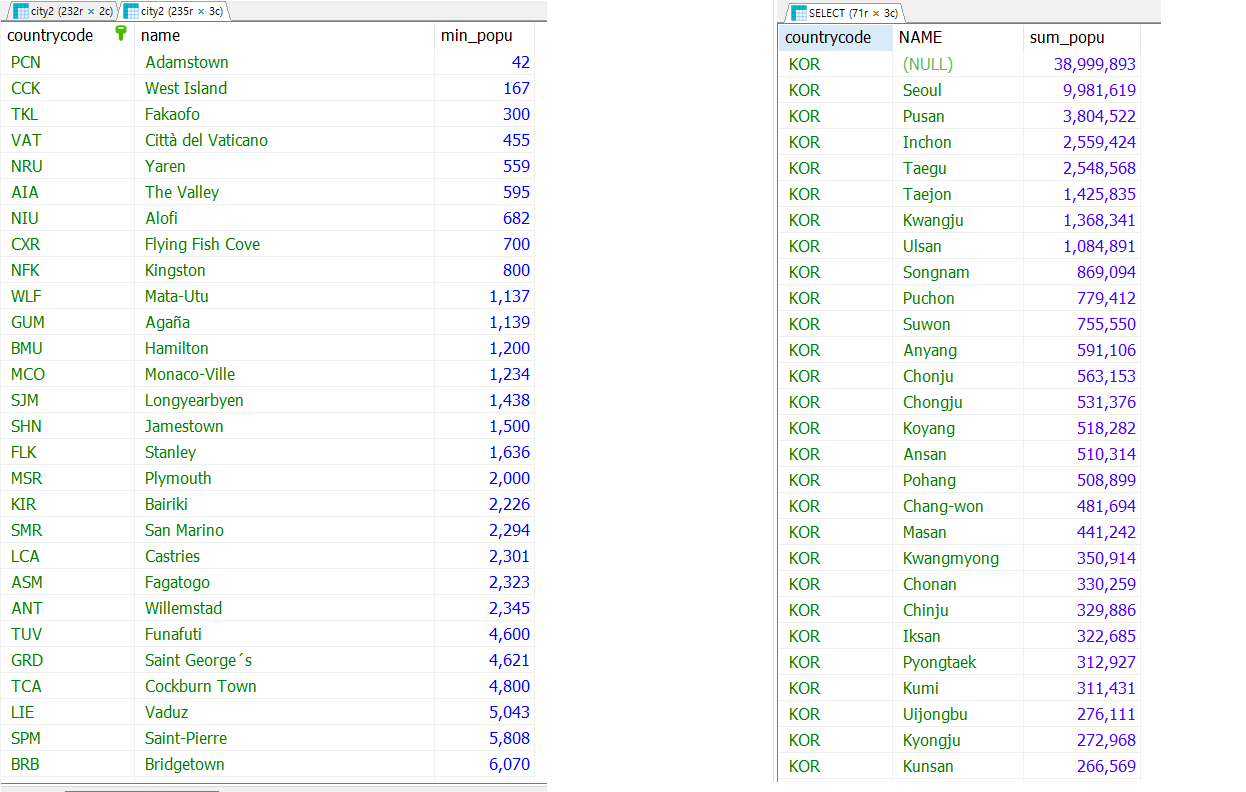

In [ ]:
from IPython.display import Image

Image('/content/실습_결과셋.png')

# 기타

In [1]:
- sql 중고급 이상
  - 프로시저, 함수 -> 프로그래밍( sql을 이용 )
    - 복잡한 요구사항을 결합하여 하나의 수행 단위 구성
  - 트리거, 모델
- 모델링
  - 요구사항에 맞춰 ERD 설계, 테이블 모델링 등등


SyntaxError: invalid syntax (ipython-input-2511705729.py, line 1)